# **`Title`**:Sentiment Analysis of Real-time Flipkart Product Reviews

### `Objective`
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

In [33]:
df= pd.read_csv(r"sentiment.csv")

In [35]:
df.head(5) # top 5 record

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [37]:
df.shape

(8518, 8)

In [39]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [43]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [45]:
df.dropna(inplace = True)

# 2. Exploratory Data Analysis

In [49]:
df.head(5)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5


In [51]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [53]:
df.shape

(8013, 8)

In [57]:
df['Ratings'].value_counts()

Ratings
5    4803
4    1659
1     688
3     575
2     288
Name: count, dtype: int64

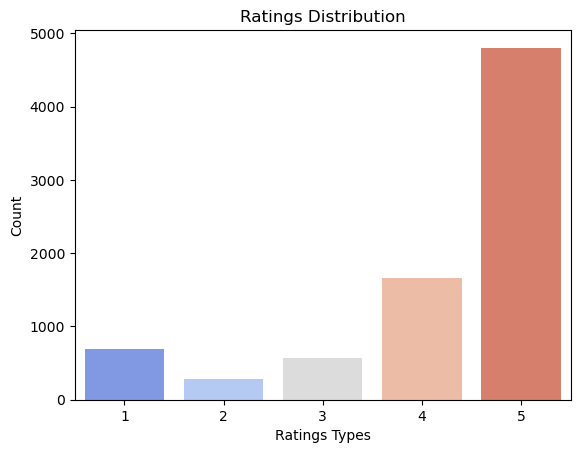

In [61]:
# Plot with a specific palette
sns.countplot(x='Ratings', data=df, palette='coolwarm')

plt.title("Ratings Distribution")
plt.xlabel("Ratings Types")
plt.ylabel("Count")
plt.show()

### A word cloud helps visualize the most frequent words in customer reviews

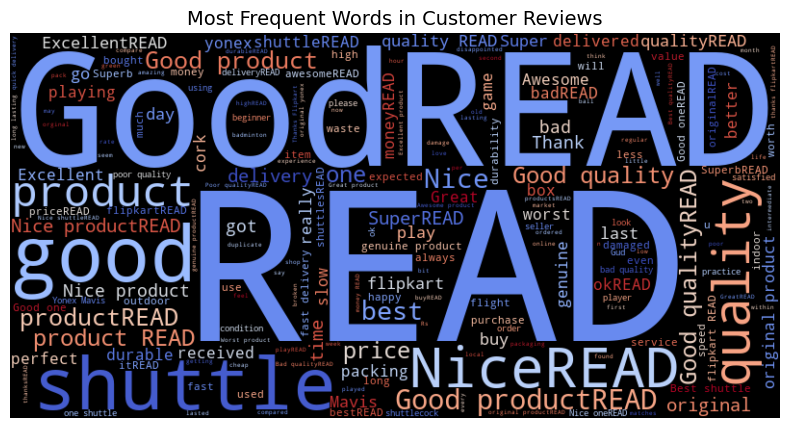

In [63]:
# Combine all review text into a single string
text = " ".join(df['Review text'].dropna())

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(text)

# Display the Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Customer Reviews", fontsize=14)
plt.show()

# Step 1 - Identify Input and Output

In [65]:
def number_input_output(n):
    if n <= 3:
        return 0
    else:
        return 1


In [67]:
df['Ratings'] = df['Ratings'].apply(number_input_output)

In [71]:
df['Ratings'].value_counts()

Ratings
1    6462
0    1551
Name: count, dtype: int64

In [73]:
X = df['Review text']
y = df.Ratings
print(X.shape, y.shape)

(8013,) (8013,)


# Step 2 - Split the Data into Train and Test

In [75]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009,) (6009,)
(2004,) (2004,)


# Step 3: Data Preprocessing on train data (X_train)

In [77]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


In [79]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)


   

In [85]:
# import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')



vect = CountVectorizer(preprocessor=clean, max_features=5000) # instantiate a vectoriezer
%time X_train_dtm = vect.fit_transform(X_train) # use it to extract features from training data

print(X_train_dtm.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: total: 2.22 s
Wall time: 2.22 s
(6009, 2979)


# Step 4: Data Preprocessing on test data (X_test)

In [87]:
# Step 4: Data Preprocessing on test data (X_test)


# transform testing data (using training data's features)
%time X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

CPU times: total: 766 ms
Wall time: 774 ms
(2004, 2979)


In [89]:
print(X_train_dtm.shape, X_test_dtm.shape)

(6009, 2979) (2004, 2979)


# Step 5 - Building a Model (i.e. Train the classifier)

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [93]:
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 10.5 ms


MultinomialNB()

In [95]:
y_train_pred = nb.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)


0.9428798095993653

In [97]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 679,  467],
       [ 109, 4754]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

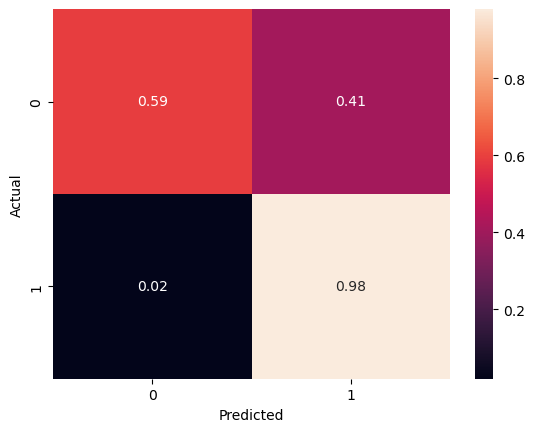

In [99]:
cm = metrics.confusion_matrix(y_train, y_train_pred)

actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Step 7: Evaluate on test data

In [101]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm) 

metrics.f1_score(y_test, y_test_pred)


0.9262025694651927

In [103]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 207,  198],
       [  49, 1550]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

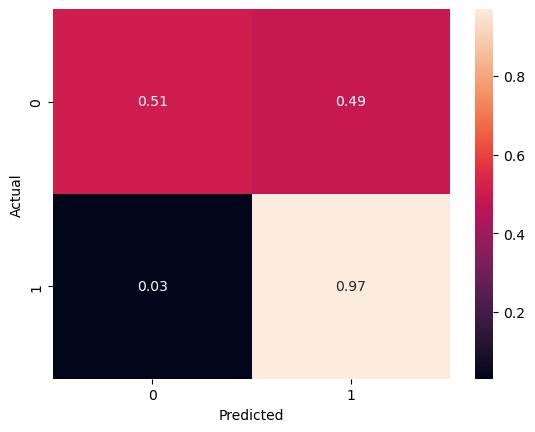

In [107]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [48]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9880924766102219
Test Score (F1 Score): 0.9806645826097025


In [ ]:
# save 

In [54]:
joblib.dump(classifier, "C:\Data_Analysis_intern-online_jan_march_IRL_2025\MLOPS\Sentiment Analysis of Real-time Flipkart Product Reviews\logistic_regression_pipeline.pkl")

['C:\\Data_Analysis_intern-online_jan_march_IRL_2025\\MLOPS\\Sentiment Analysis of Real-time Flipkart Product Reviews\\logistic_regression_pipeline.pkl']

In [90]:
vectorizer_path = r'C:\\Data_Analysis_intern-online_jan_march_IRL_2025\\MLOPS\\Sentiment Analysis of Real-time Flipkart Product Reviews\\count_vectorizer.pkl'

# Save the CountVectorizer
joblib.dump(vect, vectorizer_path)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


# Creating an Optimal Workflow
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [110]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [112]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min
Wall time: 2min 1s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x0000023E2857E700>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9271961492178099


In [116]:
import joblib
from joblib import Memory

import os

In [120]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 38s
Wall time: 1min 39s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x0000023E2857E700>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9271961492178099


In [122]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'demo_model_nb.pkl')

['demo_model_nb.pkl']

In [124]:
y_train.unique()

array([0, 1], dtype=int64)

In [126]:
# Let's analyse the models prediction time and model size
model = joblib.load('demo_model_nb.pkl')

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 734 ms
Wall time: 747 ms
Test Score (F1): 0.9271961492178099


In [128]:
print("Model Size:", os.path.getsize('demo_model_nb.pkl'), "Bytes")

Model Size: 87127 Bytes


In [132]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 2.11 s
Wall time: 2.14 s
CPU times: total: 734 ms
Wall time: 728 ms


In [134]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 3.02 s
Wall time: 3.01 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9271961492178099


In [136]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'demo_model_nb_unclean.pkl')

['demo_model_nb_unclean.pkl']

In [138]:
# Let's analyse the models prediction time and model size

model = joblib.load('demo_model_nb_unclean.pkl')

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 15.6 ms
Wall time: 10.1 ms
Test Score (F1): 0.9271961492178099


In [140]:
print("Model Size:", os.path.getsize('demo_model_nb_unclean.pkl'), "Bytes")

Model Size: 87095 Bytes


# Putting it all together: Implementing various Algorithms to find the Best Model


In [143]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1 , error_score='raise'
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 3.61 s
Wall time: 3.62 s
Score on Test Data:  0.9271961492178099
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 18.6 s
Wall time: 18.9 s
Score on Test Data:  0.9142519219396806
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 8min 52s
Wall time: 9min 8s
Score on Test Data:  0.920625


In [144]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [145]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 31.2 ms
Wall time: 27.5 ms
Test Score (F1) 0.9271961492178099
Model Size: 87111 Bytes
********** decision_tree **********
CPU times: total: 31.2 ms
Wall time: 29.2 ms
Test Score (F1) 0.9142519219396806
Model Size: 111069 Bytes
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 27.1 ms
Test Score (F1) 0.920625
Model Size: 102698 Bytes
